In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Step 1:
# Import the boston house dataset from sklearn.datasets.
# from sklearn.datasets import load_boston

# boston = load_boston()

# Create train and test datasets.

# Check the data description and familiarize yourself with the data.



In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inc

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

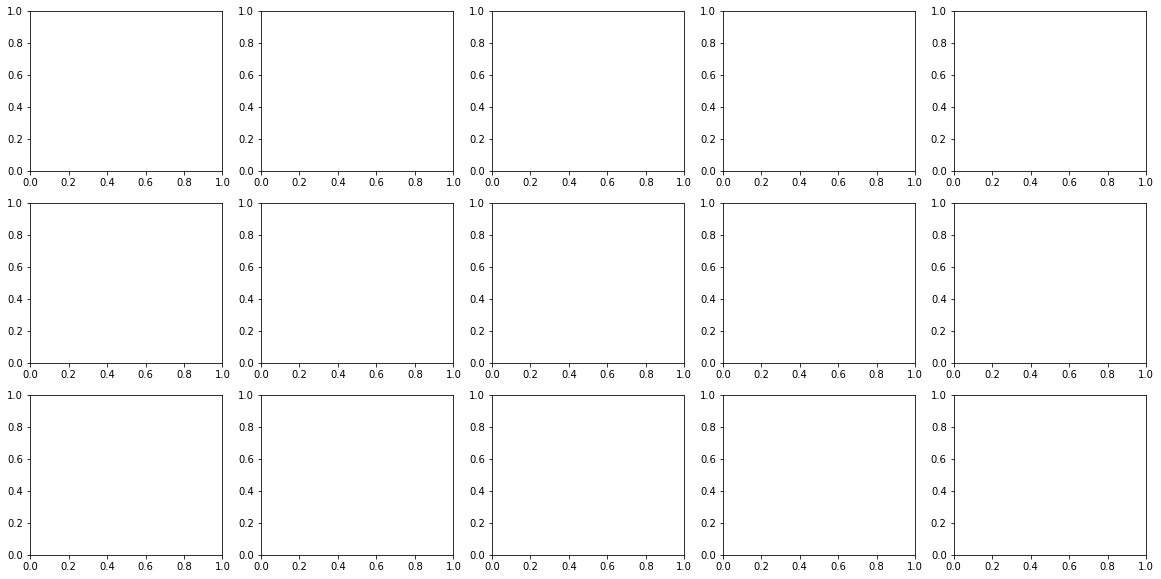

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

In [9]:
axes.ravel()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [10]:
dir(axes[0][0])

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_

In [11]:
# Step 2:
# Create a scatter plot of each attribute with the mean house price.

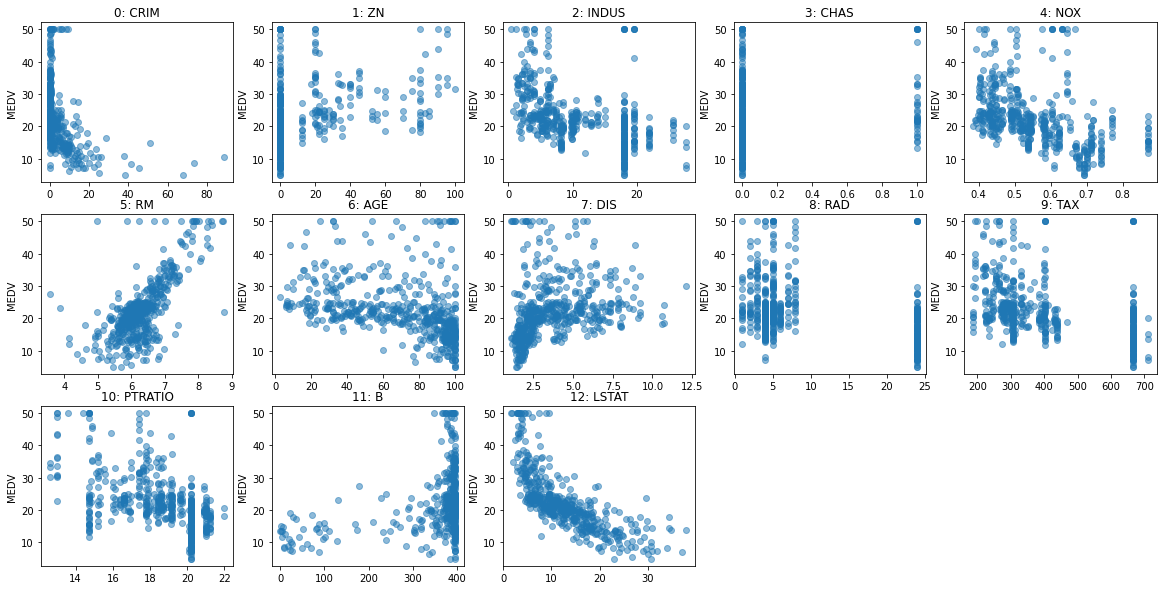

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [13]:
# Step 3:
# Create a box plot of all attributes.

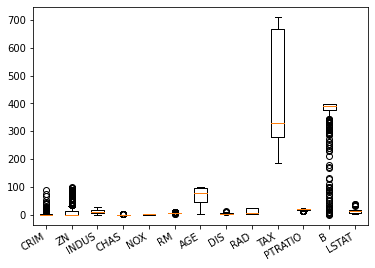

In [14]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1),
           boston.feature_names, rotation=30, ha="right"); #horizontalalignment or ha

In [15]:
# Step 4:
# Use StandardScaler() to scale the training data set.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
# Step 5:
# Use KNeighborsRegressor() to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.



In [18]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train, y_train)
knr.score(X_train, y_train)

0.7066272660046313

In [19]:
knr.score(X_test, y_test)

0.4616380924610112

In [20]:
knr_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)
knr_scaled.fit(X_train_scaled, y_train)
knr_scaled.score(X_train_scaled, y_train)

0.849576948978109

In [21]:
X_test_scaled = scaler.transform(X_test)
knr_scaled.score(X_test_scaled, y_test)

0.606952770711171

In [23]:
# Step 6:
# Repeat Step 5 for RandomForestRegressor. Use

# RandomForestRegressor(n_estimators=100, random_state=0)


In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7952684623500126

In [25]:
rf_scaled = RandomForestRegressor(n_estimators=100, random_state=0)
rf_scaled.fit(X_train_scaled, y_train)
rf_scaled.score(X_test_scaled, y_test)

0.7953897811917161